In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.ticker as ticker

In [25]:
#Загрузка датасета
df = pd.read_csv('ebola_2014_2016_clean.csv')
df.head(5)

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0


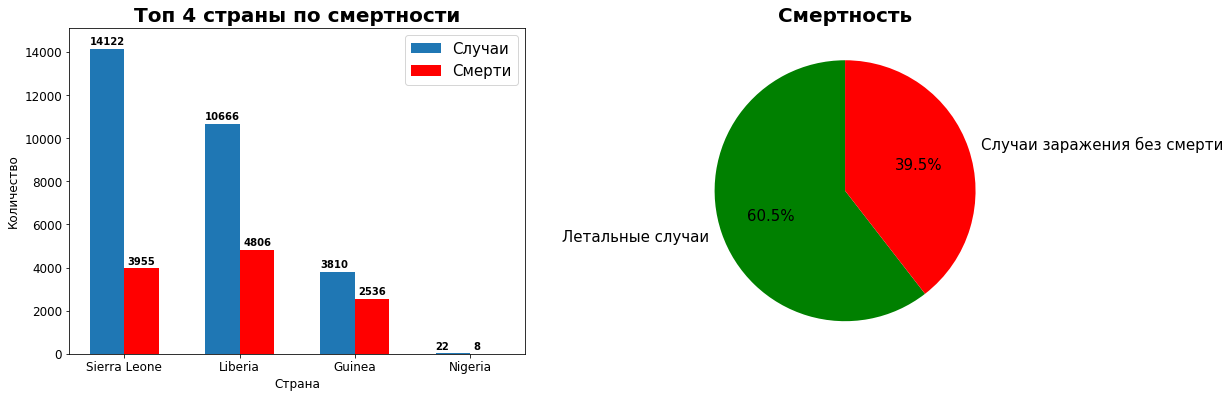

In [26]:
#Топ 4 страны по зараженям Эболой
dftemp = df.sort_values(by="Cumulative no. of confirmed, probable and suspected cases", ascending=False)
countries = dftemp["Country"].unique()[0:4]
cases = []
for c in countries:
    cases.append(np.sort(df.loc[df['Country'] == c]["Cumulative no. of confirmed, probable and suspected cases"].unique())[-1])
f , ax  = plt.subplots(1,2,figsize=(18,6))
ax[0].bar(np.arange(0,4),cases,width=0.3, label = 'Случаи')
ax[0].set_title('Топ 4 страны по смертности',fontsize=20, fontweight='bold')
ax[0].set_xlabel('Страна',fontsize=12)
ax[0].set_ylabel('Количество',fontsize=12)
counter = 0
for i in cases:
    ax[0].text(counter-0.15, i+200, int(i), color='black', fontsize=10, fontweight='bold')
    counter +=1 
ax[0].set_ylim([0,cases[0]+1000])
#Топ 4 страны по смертей от Эболой
dftemp = df.sort_values(by = "Cumulative no. of confirmed, probable and suspected deaths", ascending = False)
countriesD = dftemp['Country'].unique()[0:4]
deaths = []
for c in countries:
    deaths.append(np.sort(df.loc[dftemp['Country'] == c]["Cumulative no. of confirmed, probable and suspected deaths"].unique())[-1])
deaths
ax[0].bar(np.arange(0,4)+0.3, deaths, width = 0.3, color = 'red', label = 'Смерти')
ax[0].set_xticks(np.arange(0,4)+0.3/2)
ax[0].set_xticklabels(countries)
ax[0].tick_params(axis='both',labelsize=12)
counter = 0
for i in deaths:
    ax[0].text(counter-0.12+0.3, i+200, int(i), color='black', fontsize=10, fontweight='bold')
    counter +=1 
ax[0].legend(fontsize=15)
totalCases = 0
totalDeaths = 0
for i in np.arange(0,4):
    totalCases += cases[i]
    totalDeaths += deaths[i]
ax[1].pie([totalCases-totalDeaths,totalDeaths],radius = 1,labels=['Летальные случаи','Случаи заражения без смерти'],startangle=90,colors = ['green','red'], textprops={'fontsize': 15},autopct='%1.1f%%')
ax[1].set_title('Смертность',fontsize=20,fontweight='bold')
plt.show()


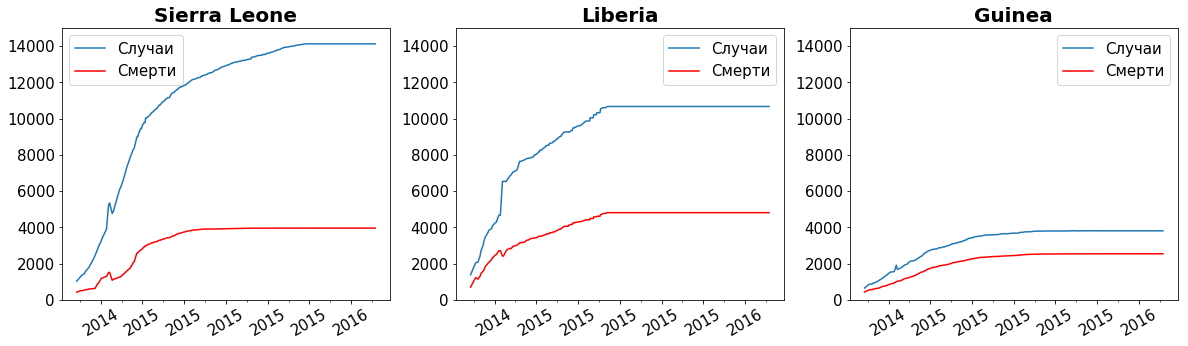

In [27]:
#график распространения вируса
#график Sierra Leone
f, ax = plt.subplots(1,3,figsize=(20,5))
temp = df.loc[df['Country'] == 'Sierra Leone']['Date'].tolist()
casesSierra = df.loc[df['Country'] == 'Sierra Leone'].sort_values(by='Date')['Cumulative no. of confirmed, probable and suspected cases'].tolist()
DeathsSierra = df.loc[df['Country'] == 'Sierra Leone'].sort_values(by='Date')['Cumulative no. of confirmed, probable and suspected deaths'].tolist()
timeSierra = []

for i in temp:
    timeSierra.append(datetime.strptime(i,'%Y-%m-%d'))
ax[0].plot(timeSierra, casesSierra,label='Случаи')
ax[0].plot(timeSierra, DeathsSierra,color='red',label='Смерти')
ax[0].set_title('Sierra Leone',fontsize=20,fontweight='bold')
ax[0].tick_params(axis='both', labelsize=15)
ax[0].tick_params(axis='x',rotation=30)
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(8))
ax[0].xaxis.set_minor_locator(ticker.MaxNLocator(16))
ax[0].legend(fontsize='15')
ax[0].set_ylim([0,15000])

#график Liberia
temp = df.loc[df['Country'] == 'Liberia']['Date'].tolist()
casesLiberia = df.loc[df['Country'] == 'Liberia'].sort_values(by='Date')['Cumulative no. of confirmed, probable and suspected cases'].tolist()
DeathsLiberia = df.loc[df['Country'] == 'Liberia'].sort_values(by='Date')['Cumulative no. of confirmed, probable and suspected deaths'].tolist()
timeLiberia = []
for i in temp:
    timeLiberia.append(datetime.strptime(i,'%Y-%m-%d'))

min = casesLiberia[0]
for i in range(1,len(casesLiberia)):
    if (casesLiberia[i] < min):
        casesLiberia[i] = -1
        DeathsLiberia[i] = -1
        timeLiberia[i] = ''
    else:
        min = casesLiberia[1]
casesLiberia = list(filter(lambda a: a!=-1, casesLiberia))
DeathsLiberia = list(filter(lambda a: a!=-1, DeathsLiberia))
timeLiberia = list(filter(lambda a: a!='', timeLiberia))

ax[1].plot(timeLiberia, casesLiberia,label='Случаи')
ax[1].plot(timeLiberia, DeathsLiberia,color='red',label='Смерти')
ax[1].set_title('Liberia',fontsize=20,fontweight='bold')
ax[1].tick_params(axis='both', labelsize=15)
ax[1].tick_params(axis='x',rotation=30)
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(8))
ax[1].xaxis.set_minor_locator(ticker.MaxNLocator(16))
ax[1].legend(fontsize='15')
ax[1].set_ylim([0,15000])

#график Guinea

temp = df.loc[df['Country'] == 'Guinea']['Date'].tolist()
casesGuinea = df.loc[df['Country'] == 'Guinea'].sort_values(by='Date')['Cumulative no. of confirmed, probable and suspected cases'].tolist()
DeathsGuinea = df.loc[df['Country'] == 'Guinea'].sort_values(by='Date')['Cumulative no. of confirmed, probable and suspected deaths'].tolist()
timeGuinea = []
for i in temp:
    timeGuinea.append(datetime.strptime(i,'%Y-%m-%d'))

ax[2].plot(timeGuinea, casesGuinea,label='Случаи')
ax[2].plot(timeGuinea, DeathsGuinea,color='red',label='Смерти')
ax[2].set_title('Guinea',fontsize=20,fontweight='bold')
ax[2].tick_params(axis='both', labelsize=15)
ax[2].tick_params(axis='x',rotation=30)
ax[2].xaxis.set_major_locator(ticker.MaxNLocator(8))
ax[2].xaxis.set_minor_locator(ticker.MaxNLocator(16))
ax[2].legend(fontsize='15')
ax[2].set_ylim([0,15000])
f.show()

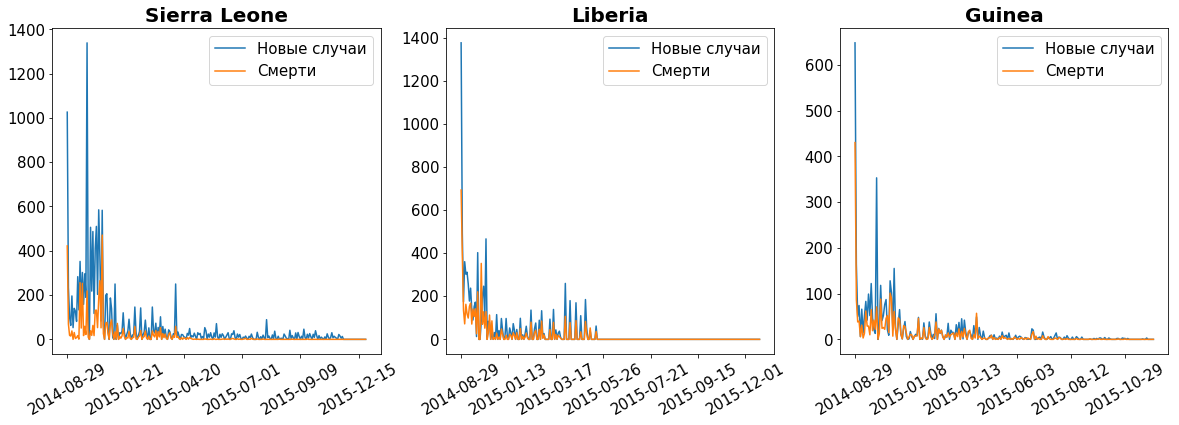

In [28]:
#нахождения количества случаев в день
countries = ['Sierra Leone', 'Liberia', 'Guinea']
f, ax = plt.subplots(1,3,figsize=(20,6))
valC = {}
valD = {}
dates = {}
for i in countries:
    valC[i] = df.loc[df['Country'] == i].sort_values(by='Date')['Cumulative no. of confirmed, probable and suspected cases'].tolist()
    dates[i] = df.loc[df['Country'] == i].sort_values(by='Date')['Date'].tolist()
    valD[i] = df.loc[df['Country'] == i].sort_values(by='Date')['Cumulative no. of confirmed, probable and suspected deaths'].tolist()
    for j in range(1,len(valC[i])):
        if (valC[i][j] < valC[i][j-1]) | (valD[i][j] < valD[i][j-1]):
            valC[i][j] = -1
            valD[i][j] = -1
            dates[i][j] = ''
    valC[i] = list(filter(lambda a: a!=-1, valC[i]))
    valD[i] = list(filter(lambda a: a!=-1, valD[i]))
    dates[i] = list(filter(lambda a: a!='', dates[i]))
    tempC = [valC[i][0]]
    tempD = [valD[i][0]]
    for j in np.arange(1,len(valD[i])):
        tC = valC[i][j] - valC[i][j-1]
        tD = valD[i][j] - valD[i][j-1]
        if(tC < 0) | (tD < 0) | (tC > 5000) | (tD > 5000):
            tC = 0
            tD = 0 
        tempC.append(tC)
        tempD.append(tD)
    valC[i] = tempC
    valD[i] = tempD
    
#создание графика
for i in np.arange(3):
    ax[i].set_title(countries[i],fontsize=20,fontweight='bold')
    ax[i].plot(dates[countries[i]],valC[countries[i]],label = 'Новые случаи')
    ax[i].plot(dates[countries[i]],valD[countries[i]],label = 'Смерти')
    ax[i].xaxis.set_major_locator(ticker.MaxNLocator(7))
    ax[i].tick_params(axis='x',rotation=30, labelsize=15)
    ax[i].tick_params(axis='y', labelsize=15)
    ax[i].legend(fontsize=15)
f.show()


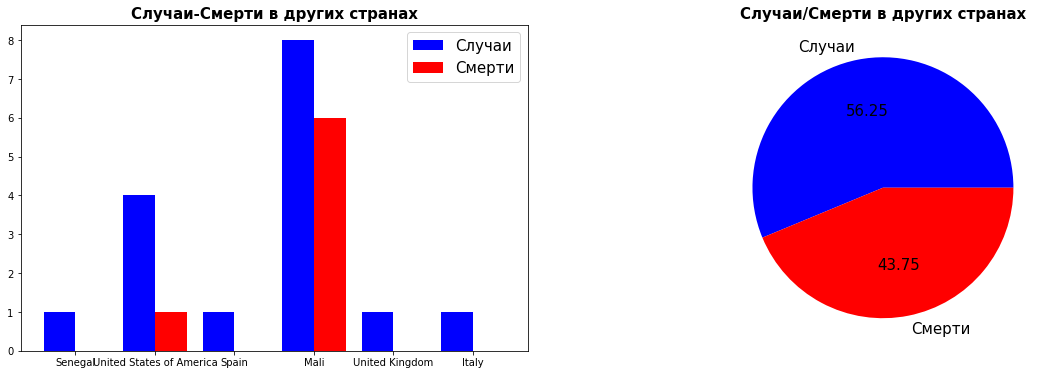

In [29]:
otherCountries = df.loc[(df['Country'] != "Sierra Leone") & (df['Country'] != "Guinea") & (df['Country'] != "Liberia") & (df['Country'] != "Nigeria")]['Country'].unique()
f, ax = plt.subplots(1,2,figsize=(20,6))
counter = 0
totalCases = 0
totalDeaths = 0
for i in otherCountries:
    valC = df.loc[df['Country'] == i].sort_values(by = 'Date')['Cumulative no. of confirmed, probable and suspected cases'].iloc[-1]
    valD = df.loc[df['Country'] == i].sort_values(by = 'Date')['Cumulative no. of confirmed, probable and suspected deaths'].iloc[-1]
    totalCases += valC
    totalDeaths += valD
    ax[0].bar(counter,valC,label='Случаи',width=0.4,color='blue')
    ax[0].bar(counter+0.4,valD,label='Смерти',width=0.4,color='red')
    counter+=1

ax[0].set_title('Случаи-Смерти в других странах', fontsize=15,fontweight='bold')
ax[0].legend({'Случаи':'blue','Смерти':'red'},fontsize=15)
ax[0].set_xticks(np.arange(counter)+0.2)
ax[0].set_xticklabels(otherCountries)
ax[1].pie([totalCases-totalDeaths,totalDeaths],labels = ['Случаи','Смерти'],colors=['Blue','Red'],autopct='%.2f',textprops={'fontsize':15})
ax[1].set_title('Случаи/Смерти в других странах',fontsize=15,fontweight='bold')
f.show()